# Red Inicial


## Imports


In [2]:
from __future__ import annotations

from itertools import product
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

In [3]:
name = "Example"
tmp_path = "./train_log/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar == True:
    import rich
    import tqdm

## Clases y Funciones


In [4]:

"""

class PacketAttack(Enum):
    @staticmethod
    def new_set(description, weight, class_ref):
        return {
            "Description": description,
            "weight": weight,
            "class": class_ref
        }

    @staticmethod
    def not_implemented():
        raise NotImplementedError(f"Class not implemented")
    @classmethod
    @cache
    def weights(cls):
        attack_weights = []
        for attack in PacketAttack:
            attack_weights.append(attack.value["weight"])
        return np.array(attack_weights)

    # ----ENUM VALUES----
    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)
    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)


gen = DOS_Packet_Generator(step_dur=1e-6,seed=1)




print(len(gen.generate_packets()))

"""

'\n\nclass PacketAttack(Enum):\n    @staticmethod\n    def new_set(description, weight, class_ref):\n        return {\n            "Description": description,\n            "weight": weight,\n            "class": class_ref\n        }\n\n    @staticmethod\n    def not_implemented():\n        raise NotImplementedError(f"Class not implemented")\n    @classmethod\n    @cache\n    def weights(cls):\n        attack_weights = []\n        for attack in PacketAttack:\n            attack_weights.append(attack.value["weight"])\n        return np.array(attack_weights)\n\n    # ----ENUM VALUES----\n    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)\n    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)\n\n\ngen = DOS_Packet_Generator(step_dur=1e-6,seed=1)\n\n\n\n\nprint(len(gen.generate_packets()))\n\n'

In [5]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun

## Entrenamiento


In [5]:

seed = None
env: RouterEnv = make(env_id, seed=seed)
# env = RouterEnv(seed=None)
check_env(env)

new_logger: Logger = configure(tmp_path, ["stdout", "csv"])
env = Monitor(env, tmp_path)


model: PPO = PPO("MultiInputPolicy", env,
                 verbose=True)


"""
eval_callback = EvalCallback(
    env,  # Entorno de evaluación
    best_model_save_path="./logs/best_model",  # Ruta para guardar el mejor modelo
    log_path="./logs",  # Ruta para guardar estadísticas
    eval_freq=10000,  # Frecuencia de evaluación (en pasos)
    deterministic=True,
    render=False,
)
, callback=eval_callback
"""
"""
ep_info = a.ep_info_buffer
print(a.ep_info_buffer)
if ep_info is not None and len(ep_info) > 0:
    rew=ep_info[0]["r"]
    print(rew)
    saved= PPO.load("Example")
    print(ep_info.pop())
"""


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5//0.5),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Logging to ./train_log/


Using cpu device
Wrapping the env in a DummyVecEnv.


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | -1.1e+03 |
| time/              |          |
|    fps             | 411      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -615         |
| time/                   |              |
|    fps                  | 410          |
|    iterations           | 2            |
|    time_elapsed         | 9            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0057826852 |
|    clip_fraction        | 0.0409       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | 0.00148      |
|    learning_rate        | 0.0003       |
|    loss                 | 5.91e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00489     |
|    value_loss           | 1.18e+04     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -476        |
| time/                   |             |
|    fps                  | 428         |
|    iterations           | 3           |
|    time_elapsed         | 14          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.019772556 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.0292      |
|    learning_rate        | 0.0003      |
|    loss                 | 52.1        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0219     |
|    value_loss           | 96.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -361         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 4            |
|    time_elapsed         | 19           |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0006718549 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.676       |
|    explained_variance   | 0.0421       |
|    learning_rate        | 0.0003       |
|    loss                 | 716          |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.00144     |
|    value_loss           | 1.05e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -547         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 5            |
|    time_elapsed         | 24           |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0035765278 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.675       |
|    explained_variance   | 0.0437       |
|    learning_rate        | 0.0003       |
|    loss                 | 5.64e+03     |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.00201     |
|    value_loss           | 9.41e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -578        |
| time/                   |             |
|    fps                  | 429         |
|    iterations           | 6           |
|    time_elapsed         | 28          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.004626909 |
|    clip_fraction        | 0.00103     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.676      |
|    explained_variance   | 0.0567      |
|    learning_rate        | 0.0003      |
|    loss                 | 3.4e+03     |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00359    |
|    value_loss           | 6.05e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -547         |
| time/                   |              |
|    fps                  | 430          |
|    iterations           | 7            |
|    time_elapsed         | 33           |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 0.0042854054 |
|    clip_fraction        | 0.00522      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.664       |
|    explained_variance   | 0.0979       |
|    learning_rate        | 0.0003       |
|    loss                 | 2.45e+03     |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.00432     |
|    value_loss           | 6.31e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -532         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 8            |
|    time_elapsed         | 38           |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0034509953 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.668       |
|    explained_variance   | 0.324        |
|    learning_rate        | 0.0003       |
|    loss                 | 262          |
|    n_updates            | 70           |
|    policy_gradient_loss | -0.00326     |
|    value_loss           | 895          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -490         |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 9            |
|    time_elapsed         | 42           |
|    total_timesteps      | 18432        |
| train/                  |              |
|    approx_kl            | 0.0041320054 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.654       |
|    explained_variance   | 0.302        |
|    learning_rate        | 0.0003       |
|    loss                 | 923          |
|    n_updates            | 80           |
|    policy_gradient_loss | -0.00594     |
|    value_loss           | 2.05e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -480        |
| time/                   |             |
|    fps                  | 429         |
|    iterations           | 10          |
|    time_elapsed         | 47          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.010218827 |
|    clip_fraction        | 0.0828      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.657      |
|    explained_variance   | 0.135       |
|    learning_rate        | 0.0003      |
|    loss                 | 59.6        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00857    |
|    value_loss           | 102         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -435         |
| time/                   |              |
|    fps                  | 433          |
|    iterations           | 11           |
|    time_elapsed         | 52           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0019100436 |
|    clip_fraction        | 0.00313      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.629       |
|    explained_variance   | 0.294        |
|    learning_rate        | 0.0003       |
|    loss                 | 992          |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00274     |
|    value_loss           | 2.18e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -393        |
| time/                   |             |
|    fps                  | 433         |
|    iterations           | 12          |
|    time_elapsed         | 56          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.009275064 |
|    clip_fraction        | 0.112       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.596      |
|    explained_variance   | 0.64        |
|    learning_rate        | 0.0003      |
|    loss                 | 57.8        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.0119     |
|    value_loss           | 113         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -351         |
| time/                   |              |
|    fps                  | 434          |
|    iterations           | 13           |
|    time_elapsed         | 61           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0069146827 |
|    clip_fraction        | 0.0563       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.563       |
|    explained_variance   | 0.622        |
|    learning_rate        | 0.0003       |
|    loss                 | 33.5         |
|    n_updates            | 120          |
|    policy_gradient_loss | -0.00517     |
|    value_loss           | 85.7         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -318         |
| time/                   |              |
|    fps                  | 435          |
|    iterations           | 14           |
|    time_elapsed         | 65           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0074539883 |
|    clip_fraction        | 0.0915       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.479       |
|    explained_variance   | 0.289        |
|    learning_rate        | 0.0003       |
|    loss                 | 38.6         |
|    n_updates            | 130          |
|    policy_gradient_loss | -0.00885     |
|    value_loss           | 68.9         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -380        |
| time/                   |             |
|    fps                  | 434         |
|    iterations           | 15          |
|    time_elapsed         | 70          |
|    total_timesteps      | 30720       |
| train/                  |             |
|    approx_kl            | 0.006131732 |
|    clip_fraction        | 0.0404      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.457      |
|    explained_variance   | 0.467       |
|    learning_rate        | 0.0003      |
|    loss                 | 119         |
|    n_updates            | 140         |
|    policy_gradient_loss | -0.0036     |
|    value_loss           | 205         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -367         |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 16           |
|    time_elapsed         | 77           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0040023504 |
|    clip_fraction        | 0.0114       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.494       |
|    explained_variance   | 0.232        |
|    learning_rate        | 0.0003       |
|    loss                 | 6.6e+03      |
|    n_updates            | 150          |
|    policy_gradient_loss | -0.00384     |
|    value_loss           | 9.4e+03      |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -331         |
| time/                   |              |
|    fps                  | 421          |
|    iterations           | 17           |
|    time_elapsed         | 82           |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 0.0018422774 |
|    clip_fraction        | 0.00991      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.469       |
|    explained_variance   | 0.609        |
|    learning_rate        | 0.0003       |
|    loss                 | 301          |
|    n_updates            | 160          |
|    policy_gradient_loss | -0.00247     |
|    value_loss           | 1.01e+03     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -313         |
| time/                   |              |
|    fps                  | 420          |
|    iterations           | 18           |
|    time_elapsed         | 87           |
|    total_timesteps      | 36864        |
| train/                  |              |
|    approx_kl            | 0.0052343705 |
|    clip_fraction        | 0.0407       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.428       |
|    explained_variance   | 0.761        |
|    learning_rate        | 0.0003       |
|    loss                 | 74.6         |
|    n_updates            | 170          |
|    policy_gradient_loss | -0.00351     |
|    value_loss           | 143          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -291         |
| time/                   |              |
|    fps                  | 421          |
|    iterations           | 19           |
|    time_elapsed         | 92           |
|    total_timesteps      | 38912        |
| train/                  |              |
|    approx_kl            | 0.0027326308 |
|    clip_fraction        | 0.00913      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.405       |
|    explained_variance   | 0.685        |
|    learning_rate        | 0.0003       |
|    loss                 | 333          |
|    n_updates            | 180          |
|    policy_gradient_loss | -0.00455     |
|    value_loss           | 586          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -231         |
| time/                   |              |
|    fps                  | 421          |
|    iterations           | 20           |
|    time_elapsed         | 97           |
|    total_timesteps      | 40960        |
| train/                  |              |
|    approx_kl            | 0.0007773072 |
|    clip_fraction        | 0.00449      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.38        |
|    explained_variance   | 0.718        |
|    learning_rate        | 0.0003       |
|    loss                 | 83.5         |
|    n_updates            | 190          |
|    policy_gradient_loss | -0.000801    |
|    value_loss           | 278          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -219         |
| time/                   |              |
|    fps                  | 422          |
|    iterations           | 21           |
|    time_elapsed         | 101          |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0033200677 |
|    clip_fraction        | 0.0269       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.389       |
|    explained_variance   | 0.734        |
|    learning_rate        | 0.0003       |
|    loss                 | 324          |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00574     |
|    value_loss           | 517          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -205        |
| time/                   |             |
|    fps                  | 423         |
|    iterations           | 22          |
|    time_elapsed         | 106         |
|    total_timesteps      | 45056       |
| train/                  |             |
|    approx_kl            | 0.004715251 |
|    clip_fraction        | 0.0523      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.462      |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.0003      |
|    loss                 | 147         |
|    n_updates            | 210         |
|    policy_gradient_loss | -0.00407    |
|    value_loss           | 329         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -195         |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 23           |
|    time_elapsed         | 111          |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 0.0020588194 |
|    clip_fraction        | 0.0135       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.395       |
|    explained_variance   | 0.815        |
|    learning_rate        | 0.0003       |
|    loss                 | 65.7         |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.00157     |
|    value_loss           | 146          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -134         |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 24           |
|    time_elapsed         | 115          |
|    total_timesteps      | 49152        |
| train/                  |              |
|    approx_kl            | 0.0030274668 |
|    clip_fraction        | 0.0141       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.405       |
|    explained_variance   | 0.831        |
|    learning_rate        | 0.0003       |
|    loss                 | 84.5         |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.00163     |
|    value_loss           | 161          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -81.4        |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 25           |
|    time_elapsed         | 120          |
|    total_timesteps      | 51200        |
| train/                  |              |
|    approx_kl            | 0.0015219578 |
|    clip_fraction        | 0.00532      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.354       |
|    explained_variance   | 0.746        |
|    learning_rate        | 0.0003       |
|    loss                 | 186          |
|    n_updates            | 240          |
|    policy_gradient_loss | -0.00107     |
|    value_loss           | 587          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -72.9       |
| time/                   |             |
|    fps                  | 423         |
|    iterations           | 26          |
|    time_elapsed         | 125         |
|    total_timesteps      | 53248       |
| train/                  |             |
|    approx_kl            | 0.001317726 |
|    clip_fraction        | 0.0292      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.339      |
|    explained_variance   | 0.491       |
|    learning_rate        | 0.0003      |
|    loss                 | 55.5        |
|    n_updates            | 250         |
|    policy_gradient_loss | -6.61e-05   |
|    value_loss           | 115         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | -24.4        |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 27           |
|    time_elapsed         | 130          |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 0.0022397926 |
|    clip_fraction        | 0.0209       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.807        |
|    learning_rate        | 0.0003       |
|    loss                 | 54.9         |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00199     |
|    value_loss           | 141          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | -11.9       |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 28          |
|    time_elapsed         | 134         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.003558359 |
|    clip_fraction        | 0.0338      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.256      |
|    explained_variance   | 0.405       |
|    learning_rate        | 0.0003      |
|    loss                 | 38.4        |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.000984   |
|    value_loss           | 72.6        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 5.4          |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 29           |
|    time_elapsed         | 139          |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 0.0035325782 |
|    clip_fraction        | 0.0226       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.267       |
|    explained_variance   | 0.804        |
|    learning_rate        | 0.0003       |
|    loss                 | 60           |
|    n_updates            | 280          |
|    policy_gradient_loss | -0.00222     |
|    value_loss           | 219          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 34.1         |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 30           |
|    time_elapsed         | 144          |
|    total_timesteps      | 61440        |
| train/                  |              |
|    approx_kl            | 0.0023094465 |
|    clip_fraction        | 0.0338       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.184       |
|    explained_variance   | 0.408        |
|    learning_rate        | 0.0003       |
|    loss                 | 41.9         |
|    n_updates            | 290          |
|    policy_gradient_loss | -0.00276     |
|    value_loss           | 97.5         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 41.8         |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 31           |
|    time_elapsed         | 149          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0019850708 |
|    clip_fraction        | 0.0375       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.245       |
|    explained_variance   | 0.678        |
|    learning_rate        | 0.0003       |
|    loss                 | 36.7         |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00342     |
|    value_loss           | 98.1         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 48          |
| time/                   |             |
|    fps                  | 425         |
|    iterations           | 32          |
|    time_elapsed         | 154         |
|    total_timesteps      | 65536       |
| train/                  |             |
|    approx_kl            | 0.003590766 |
|    clip_fraction        | 0.064       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.237      |
|    explained_variance   | 0.601       |
|    learning_rate        | 0.0003      |
|    loss                 | 33.6        |
|    n_updates            | 310         |
|    policy_gradient_loss | -0.00424    |
|    value_loss           | 116         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 54.7         |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 33           |
|    time_elapsed         | 159          |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 0.0011653097 |
|    clip_fraction        | 0.0267       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.708        |
|    learning_rate        | 0.0003       |
|    loss                 | 71.4         |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.00116     |
|    value_loss           | 108          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 90           |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 34           |
|    time_elapsed         | 164          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0015156372 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.167       |
|    explained_variance   | 0.711        |
|    learning_rate        | 0.0003       |
|    loss                 | 60           |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.000541    |
|    value_loss           | 86.5         |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 131           |
| time/                   |               |
|    fps                  | 423           |
|    iterations           | 35            |
|    time_elapsed         | 169           |
|    total_timesteps      | 71680         |
| train/                  |               |
|    approx_kl            | 0.00094595755 |
|    clip_fraction        | 0.0169        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.251        |
|    explained_variance   | 0.726         |
|    learning_rate        | 0.0003        |
|    loss                 | 75            |
|    n_updates            | 340           |
|    policy_gradient_loss | -0.000755     |
|    value_loss           | 223           |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 139           |
| time/                   |               |
|    fps                  | 423           |
|    iterations           | 36            |
|    time_elapsed         | 173           |
|    total_timesteps      | 73728         |
| train/                  |               |
|    approx_kl            | 0.00054715906 |
|    clip_fraction        | 0.00205       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.199        |
|    explained_variance   | 0.77          |
|    learning_rate        | 0.0003        |
|    loss                 | 94.1          |
|    n_updates            | 350           |
|    policy_gradient_loss | -0.000607     |
|    value_loss           | 163           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 141         |
| time/                   |             |
|    fps                  | 423         |
|    iterations           | 37          |
|    time_elapsed         | 178         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.002603738 |
|    clip_fraction        | 0.031       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.205      |
|    explained_variance   | 0.786       |
|    learning_rate        | 0.0003      |
|    loss                 | 279         |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.00599    |
|    value_loss           | 470         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 148          |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 38           |
|    time_elapsed         | 183          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0011677439 |
|    clip_fraction        | 0.0266       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.207       |
|    explained_variance   | 0.647        |
|    learning_rate        | 0.0003       |
|    loss                 | 43.9         |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.00063     |
|    value_loss           | 111          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 148          |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 39           |
|    time_elapsed         | 188          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0008217916 |
|    clip_fraction        | 0.00874      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.213       |
|    explained_variance   | 0.842        |
|    learning_rate        | 0.0003       |
|    loss                 | 114          |
|    n_updates            | 380          |
|    policy_gradient_loss | 0.000171     |
|    value_loss           | 225          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 151           |
| time/                   |               |
|    fps                  | 424           |
|    iterations           | 40            |
|    time_elapsed         | 193           |
|    total_timesteps      | 81920         |
| train/                  |               |
|    approx_kl            | 0.00097089866 |
|    clip_fraction        | 0.0222        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.185        |
|    explained_variance   | 0.774         |
|    learning_rate        | 0.0003        |
|    loss                 | 103           |
|    n_updates            | 390           |
|    policy_gradient_loss | -0.000145     |
|    value_loss           | 164           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 156         |
| time/                   |             |
|    fps                  | 424         |
|    iterations           | 41          |
|    time_elapsed         | 197         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.001856212 |
|    clip_fraction        | 0.0221      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.173      |
|    explained_variance   | 0.856       |
|    learning_rate        | 0.0003      |
|    loss                 | 83.3        |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.000182   |
|    value_loss           | 279         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 154          |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 42           |
|    time_elapsed         | 203          |
|    total_timesteps      | 86016        |
| train/                  |              |
|    approx_kl            | 0.0015855012 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.171       |
|    explained_variance   | 0.866        |
|    learning_rate        | 0.0003       |
|    loss                 | 166          |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.000174    |
|    value_loss           | 287          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 160         |
| time/                   |             |
|    fps                  | 423         |
|    iterations           | 43          |
|    time_elapsed         | 207         |
|    total_timesteps      | 88064       |
| train/                  |             |
|    approx_kl            | 0.010091217 |
|    clip_fraction        | 0.0344      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.166      |
|    explained_variance   | 0.664       |
|    learning_rate        | 0.0003      |
|    loss                 | 118         |
|    n_updates            | 420         |
|    policy_gradient_loss | -0.00244    |
|    value_loss           | 201         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 172          |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 44           |
|    time_elapsed         | 212          |
|    total_timesteps      | 90112        |
| train/                  |              |
|    approx_kl            | 0.0035425758 |
|    clip_fraction        | 0.013        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.118       |
|    explained_variance   | 0.745        |
|    learning_rate        | 0.0003       |
|    loss                 | 102          |
|    n_updates            | 430          |
|    policy_gradient_loss | -0.00033     |
|    value_loss           | 198          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 175          |
| time/                   |              |
|    fps                  | 423          |
|    iterations           | 45           |
|    time_elapsed         | 217          |
|    total_timesteps      | 92160        |
| train/                  |              |
|    approx_kl            | 0.0013540769 |
|    clip_fraction        | 0.0171       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.156       |
|    explained_variance   | 0.821        |
|    learning_rate        | 0.0003       |
|    loss                 | 52.1         |
|    n_updates            | 440          |
|    policy_gradient_loss | -0.000339    |
|    value_loss           | 127          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 180           |
| time/                   |               |
|    fps                  | 423           |
|    iterations           | 46            |
|    time_elapsed         | 222           |
|    total_timesteps      | 94208         |
| train/                  |               |
|    approx_kl            | 0.00016427836 |
|    clip_fraction        | 0.0148        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.125        |
|    explained_variance   | 0.683         |
|    learning_rate        | 0.0003        |
|    loss                 | 63.9          |
|    n_updates            | 450           |
|    policy_gradient_loss | 0.00141       |
|    value_loss           | 114           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 176          |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 47           |
|    time_elapsed         | 226          |
|    total_timesteps      | 96256        |
| train/                  |              |
|    approx_kl            | 0.0043346086 |
|    clip_fraction        | 0.0268       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.156       |
|    explained_variance   | 0.682        |
|    learning_rate        | 0.0003       |
|    loss                 | 53.2         |
|    n_updates            | 460          |
|    policy_gradient_loss | -0.00064     |
|    value_loss           | 134          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 187          |
| time/                   |              |
|    fps                  | 424          |
|    iterations           | 48           |
|    time_elapsed         | 231          |
|    total_timesteps      | 98304        |
| train/                  |              |
|    approx_kl            | 0.0012855603 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.164       |
|    explained_variance   | 0.779        |
|    learning_rate        | 0.0003       |
|    loss                 | 86.2         |
|    n_updates            | 470          |
|    policy_gradient_loss | 0.000103     |
|    value_loss           | 146          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 184         |
| time/                   |             |
|    fps                  | 425         |
|    iterations           | 49          |
|    time_elapsed         | 235         |
|    total_timesteps      | 100352      |
| train/                  |             |
|    approx_kl            | 0.009008728 |
|    clip_fraction        | 0.0217      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.15       |
|    explained_variance   | 0.64        |
|    learning_rate        | 0.0003      |
|    loss                 | 65.1        |
|    n_updates            | 480         |
|    policy_gradient_loss | -0.000441   |
|    value_loss           | 151         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 192          |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 50           |
|    time_elapsed         | 240          |
|    total_timesteps      | 102400       |
| train/                  |              |
|    approx_kl            | 0.0020332455 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.122       |
|    explained_variance   | 0.695        |
|    learning_rate        | 0.0003       |
|    loss                 | 54.8         |
|    n_updates            | 490          |
|    policy_gradient_loss | 0.000152     |
|    value_loss           | 150          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 194          |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 51           |
|    time_elapsed         | 244          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0008191403 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.077       |
|    explained_variance   | 0.44         |
|    learning_rate        | 0.0003       |
|    loss                 | 56.8         |
|    n_updates            | 500          |
|    policy_gradient_loss | -0.000347    |
|    value_loss           | 122          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 194         |
| time/                   |             |
|    fps                  | 426         |
|    iterations           | 52          |
|    time_elapsed         | 249         |
|    total_timesteps      | 106496      |
| train/                  |             |
|    approx_kl            | 0.022323295 |
|    clip_fraction        | 0.0854      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.138      |
|    explained_variance   | 0.699       |
|    learning_rate        | 0.0003      |
|    loss                 | 63.1        |
|    n_updates            | 510         |
|    policy_gradient_loss | -0.00878    |
|    value_loss           | 159         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 192          |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 53           |
|    time_elapsed         | 254          |
|    total_timesteps      | 108544       |
| train/                  |              |
|    approx_kl            | 0.0006942974 |
|    clip_fraction        | 0.0201       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.127       |
|    explained_variance   | 0.587        |
|    learning_rate        | 0.0003       |
|    loss                 | 38.9         |
|    n_updates            | 520          |
|    policy_gradient_loss | -0.000836    |
|    value_loss           | 125          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 199           |
| time/                   |               |
|    fps                  | 427           |
|    iterations           | 54            |
|    time_elapsed         | 258           |
|    total_timesteps      | 110592        |
| train/                  |               |
|    approx_kl            | 6.8685884e-05 |
|    clip_fraction        | 0.00527       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.156        |
|    explained_variance   | 0.742         |
|    learning_rate        | 0.0003        |
|    loss                 | 84.1          |
|    n_updates            | 530           |
|    policy_gradient_loss | 0.00102       |
|    value_loss           | 293           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 197          |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 55           |
|    time_elapsed         | 263          |
|    total_timesteps      | 112640       |
| train/                  |              |
|    approx_kl            | 0.0012823597 |
|    clip_fraction        | 0.0193       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.162       |
|    explained_variance   | 0.804        |
|    learning_rate        | 0.0003       |
|    loss                 | 126          |
|    n_updates            | 540          |
|    policy_gradient_loss | -0.00302     |
|    value_loss           | 271          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 202          |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 56           |
|    time_elapsed         | 267          |
|    total_timesteps      | 114688       |
| train/                  |              |
|    approx_kl            | 0.0010320898 |
|    clip_fraction        | 0.0128       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.153       |
|    explained_variance   | 0.828        |
|    learning_rate        | 0.0003       |
|    loss                 | 79.7         |
|    n_updates            | 550          |
|    policy_gradient_loss | -0.000699    |
|    value_loss           | 223          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 203          |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 57           |
|    time_elapsed         | 273          |
|    total_timesteps      | 116736       |
| train/                  |              |
|    approx_kl            | 0.0013129504 |
|    clip_fraction        | 0.0144       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0934      |
|    explained_variance   | 0.437        |
|    learning_rate        | 0.0003       |
|    loss                 | 67.1         |
|    n_updates            | 560          |
|    policy_gradient_loss | 0.000627     |
|    value_loss           | 107          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 208          |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 58           |
|    time_elapsed         | 279          |
|    total_timesteps      | 118784       |
| train/                  |              |
|    approx_kl            | 0.0020672206 |
|    clip_fraction        | 0.0311       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.183       |
|    explained_variance   | 0.651        |
|    learning_rate        | 0.0003       |
|    loss                 | 66.4         |
|    n_updates            | 570          |
|    policy_gradient_loss | -0.000533    |
|    value_loss           | 200          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 209          |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 59           |
|    time_elapsed         | 284          |
|    total_timesteps      | 120832       |
| train/                  |              |
|    approx_kl            | 0.0034592855 |
|    clip_fraction        | 0.023        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.158       |
|    explained_variance   | 0.662        |
|    learning_rate        | 0.0003       |
|    loss                 | 94.8         |
|    n_updates            | 580          |
|    policy_gradient_loss | -0.000969    |
|    value_loss           | 147          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 225           |
| time/                   |               |
|    fps                  | 425           |
|    iterations           | 60            |
|    time_elapsed         | 288           |
|    total_timesteps      | 122880        |
| train/                  |               |
|    approx_kl            | 0.00073324423 |
|    clip_fraction        | 0.0212        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.134        |
|    explained_variance   | 0.707         |
|    learning_rate        | 0.0003        |
|    loss                 | 32.1          |
|    n_updates            | 590           |
|    policy_gradient_loss | 0.000108      |
|    value_loss           | 116           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 228          |
| time/                   |              |
|    fps                  | 425          |
|    iterations           | 61           |
|    time_elapsed         | 293          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0013748077 |
|    clip_fraction        | 0.0118       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.134       |
|    explained_variance   | 0.763        |
|    learning_rate        | 0.0003       |
|    loss                 | 38.8         |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.000814    |
|    value_loss           | 134          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 230          |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 62           |
|    time_elapsed         | 297          |
|    total_timesteps      | 126976       |
| train/                  |              |
|    approx_kl            | 0.0010574188 |
|    clip_fraction        | 0.00596      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.125       |
|    explained_variance   | 0.749        |
|    learning_rate        | 0.0003       |
|    loss                 | 31.7         |
|    n_updates            | 610          |
|    policy_gradient_loss | 0.000507     |
|    value_loss           | 104          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 229          |
| time/                   |              |
|    fps                  | 426          |
|    iterations           | 63           |
|    time_elapsed         | 302          |
|    total_timesteps      | 129024       |
| train/                  |              |
|    approx_kl            | 0.0009096433 |
|    clip_fraction        | 0.0101       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.136       |
|    explained_variance   | 0.773        |
|    learning_rate        | 0.0003       |
|    loss                 | 77           |
|    n_updates            | 620          |
|    policy_gradient_loss | 7.42e-05     |
|    value_loss           | 128          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 223           |
| time/                   |               |
|    fps                  | 426           |
|    iterations           | 64            |
|    time_elapsed         | 307           |
|    total_timesteps      | 131072        |
| train/                  |               |
|    approx_kl            | 0.00071092974 |
|    clip_fraction        | 0.00737       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.124        |
|    explained_variance   | 0.797         |
|    learning_rate        | 0.0003        |
|    loss                 | 43.9          |
|    n_updates            | 630           |
|    policy_gradient_loss | 0.000646      |
|    value_loss           | 178           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 216          |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 65           |
|    time_elapsed         | 311          |
|    total_timesteps      | 133120       |
| train/                  |              |
|    approx_kl            | 0.0007726707 |
|    clip_fraction        | 0.0122       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.118       |
|    explained_variance   | 0.779        |
|    learning_rate        | 0.0003       |
|    loss                 | 59.5         |
|    n_updates            | 640          |
|    policy_gradient_loss | -0.000455    |
|    value_loss           | 191          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 206          |
| time/                   |              |
|    fps                  | 427          |
|    iterations           | 66           |
|    time_elapsed         | 315          |
|    total_timesteps      | 135168       |
| train/                  |              |
|    approx_kl            | 0.0007777668 |
|    clip_fraction        | 0.00537      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.136       |
|    explained_variance   | 0.823        |
|    learning_rate        | 0.0003       |
|    loss                 | 109          |
|    n_updates            | 650          |
|    policy_gradient_loss | 0.000331     |
|    value_loss           | 219          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 211          |
| time/                   |              |
|    fps                  | 428          |
|    iterations           | 67           |
|    time_elapsed         | 320          |
|    total_timesteps      | 137216       |
| train/                  |              |
|    approx_kl            | 0.0006273566 |
|    clip_fraction        | 0.00786      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.134       |
|    explained_variance   | 0.855        |
|    learning_rate        | 0.0003       |
|    loss                 | 91.9         |
|    n_updates            | 660          |
|    policy_gradient_loss | -0.000213    |
|    value_loss           | 233          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 208           |
| time/                   |               |
|    fps                  | 428           |
|    iterations           | 68            |
|    time_elapsed         | 324           |
|    total_timesteps      | 139264        |
| train/                  |               |
|    approx_kl            | 0.00061789015 |
|    clip_fraction        | 0.00845       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0968       |
|    explained_variance   | 0.534         |
|    learning_rate        | 0.0003        |
|    loss                 | 65            |
|    n_updates            | 670           |
|    policy_gradient_loss | 4.9e-05       |
|    value_loss           | 172           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 210          |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 69           |
|    time_elapsed         | 329          |
|    total_timesteps      | 141312       |
| train/                  |              |
|    approx_kl            | 0.0006124525 |
|    clip_fraction        | 0.00776      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0751      |
|    explained_variance   | 0.648        |
|    learning_rate        | 0.0003       |
|    loss                 | 54.4         |
|    n_updates            | 680          |
|    policy_gradient_loss | 0.000499     |
|    value_loss           | 134          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 205          |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 70           |
|    time_elapsed         | 334          |
|    total_timesteps      | 143360       |
| train/                  |              |
|    approx_kl            | 0.0031436533 |
|    clip_fraction        | 0.0175       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0631      |
|    explained_variance   | 0.608        |
|    learning_rate        | 0.0003       |
|    loss                 | 35           |
|    n_updates            | 690          |
|    policy_gradient_loss | -0.000683    |
|    value_loss           | 117          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 206         |
| time/                   |             |
|    fps                  | 429         |
|    iterations           | 71          |
|    time_elapsed         | 338         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.016206995 |
|    clip_fraction        | 0.0395      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.121      |
|    explained_variance   | 0.676       |
|    learning_rate        | 0.0003      |
|    loss                 | 109         |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0013     |
|    value_loss           | 191         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 187          |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 72           |
|    time_elapsed         | 343          |
|    total_timesteps      | 147456       |
| train/                  |              |
|    approx_kl            | 0.0011908852 |
|    clip_fraction        | 0.0226       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.144       |
|    explained_variance   | 0.772        |
|    learning_rate        | 0.0003       |
|    loss                 | 94.1         |
|    n_updates            | 710          |
|    policy_gradient_loss | -0.000237    |
|    value_loss           | 211          |
------------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 194        |
| time/                   |            |
|    fps                  | 429        |
|    iterations           | 73         |
|    time_elapsed         | 347        |
|    total_timesteps      | 149504     |
| train/                  |            |
|    approx_kl            | 0.00303193 |
|    clip_fraction        | 0.06       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.198     |
|    explained_variance   | 0.815      |
|    learning_rate        | 0.0003     |
|    loss                 | 111        |
|    n_updates            | 720        |
|    policy_gradient_loss | -0.00249   |
|    value_loss           | 315        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 201          |
| time/                   |              |
|    fps                  | 429          |
|    iterations           | 74           |
|    time_elapsed         | 352          |
|    total_timesteps      | 151552       |
| train/                  |              |
|    approx_kl            | 0.0006047229 |
|    clip_fraction        | 0.00698      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.13        |
|    explained_variance   | 0.55         |
|    learning_rate        | 0.0003       |
|    loss                 | 80.8         |
|    n_updates            | 730          |
|    policy_gradient_loss | 0.000975     |
|    value_loss           | 179          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 203           |
| time/                   |               |
|    fps                  | 430           |
|    iterations           | 75            |
|    time_elapsed         | 356           |
|    total_timesteps      | 153600        |
| train/                  |               |
|    approx_kl            | 0.00070319884 |
|    clip_fraction        | 0.0248        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.202        |
|    explained_variance   | 0.76          |
|    learning_rate        | 0.0003        |
|    loss                 | 105           |
|    n_updates            | 740           |
|    policy_gradient_loss | 0.00138       |
|    value_loss           | 147           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 199         |
| time/                   |             |
|    fps                  | 430         |
|    iterations           | 76          |
|    time_elapsed         | 361         |
|    total_timesteps      | 155648      |
| train/                  |             |
|    approx_kl            | 0.008180108 |
|    clip_fraction        | 0.0188      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0792     |
|    explained_variance   | 0.762       |
|    learning_rate        | 0.0003      |
|    loss                 | 68.5        |
|    n_updates            | 750         |
|    policy_gradient_loss | -0.00157    |
|    value_loss           | 89          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 203          |
| time/                   |              |
|    fps                  | 430          |
|    iterations           | 77           |
|    time_elapsed         | 365          |
|    total_timesteps      | 157696       |
| train/                  |              |
|    approx_kl            | 0.0006319483 |
|    clip_fraction        | 0.0129       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.114       |
|    explained_variance   | 0.64         |
|    learning_rate        | 0.0003       |
|    loss                 | 84.2         |
|    n_updates            | 760          |
|    policy_gradient_loss | -5.73e-05    |
|    value_loss           | 160          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 207         |
| time/                   |             |
|    fps                  | 431         |
|    iterations           | 78          |
|    time_elapsed         | 370         |
|    total_timesteps      | 159744      |
| train/                  |             |
|    approx_kl            | 0.002323672 |
|    clip_fraction        | 0.0187      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0778     |
|    explained_variance   | 0.739       |
|    learning_rate        | 0.0003      |
|    loss                 | 43.4        |
|    n_updates            | 770         |
|    policy_gradient_loss | -0.000912   |
|    value_loss           | 118         |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 195           |
| time/                   |               |
|    fps                  | 431           |
|    iterations           | 79            |
|    time_elapsed         | 375           |
|    total_timesteps      | 161792        |
| train/                  |               |
|    approx_kl            | 0.00043597864 |
|    clip_fraction        | 0.0135        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.112        |
|    explained_variance   | 0.607         |
|    learning_rate        | 0.0003        |
|    loss                 | 77.5          |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.00115      |
|    value_loss           | 155           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 196          |
| time/                   |              |
|    fps                  | 431          |
|    iterations           | 80           |
|    time_elapsed         | 379          |
|    total_timesteps      | 163840       |
| train/                  |              |
|    approx_kl            | 0.0010536177 |
|    clip_fraction        | 0.0267       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.691        |
|    learning_rate        | 0.0003       |
|    loss                 | 72.8         |
|    n_updates            | 790          |
|    policy_gradient_loss | 0.00053      |
|    value_loss           | 162          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 199           |
| time/                   |               |
|    fps                  | 431           |
|    iterations           | 81            |
|    time_elapsed         | 384           |
|    total_timesteps      | 165888        |
| train/                  |               |
|    approx_kl            | 0.00047689758 |
|    clip_fraction        | 0.00874       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.129        |
|    explained_variance   | 0.719         |
|    learning_rate        | 0.0003        |
|    loss                 | 73.9          |
|    n_updates            | 800           |
|    policy_gradient_loss | 0.000842      |
|    value_loss           | 148           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 203         |
| time/                   |             |
|    fps                  | 431         |
|    iterations           | 82          |
|    time_elapsed         | 388         |
|    total_timesteps      | 167936      |
| train/                  |             |
|    approx_kl            | 0.001822321 |
|    clip_fraction        | 0.0144      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.0922     |
|    explained_variance   | 0.673       |
|    learning_rate        | 0.0003      |
|    loss                 | 74.3        |
|    n_updates            | 810         |
|    policy_gradient_loss | -0.000785   |
|    value_loss           | 106         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 199          |
| time/                   |              |
|    fps                  | 431          |
|    iterations           | 83           |
|    time_elapsed         | 393          |
|    total_timesteps      | 169984       |
| train/                  |              |
|    approx_kl            | 0.0019252661 |
|    clip_fraction        | 0.0268       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.117       |
|    explained_variance   | 0.707        |
|    learning_rate        | 0.0003       |
|    loss                 | 44.5         |
|    n_updates            | 820          |
|    policy_gradient_loss | 0.000432     |
|    value_loss           | 129          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 197          |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 84           |
|    time_elapsed         | 398          |
|    total_timesteps      | 172032       |
| train/                  |              |
|    approx_kl            | 0.0012159639 |
|    clip_fraction        | 0.0221       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.105       |
|    explained_variance   | 0.823        |
|    learning_rate        | 0.0003       |
|    loss                 | 63.3         |
|    n_updates            | 830          |
|    policy_gradient_loss | -0.000294    |
|    value_loss           | 161          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 201           |
| time/                   |               |
|    fps                  | 432           |
|    iterations           | 85            |
|    time_elapsed         | 402           |
|    total_timesteps      | 174080        |
| train/                  |               |
|    approx_kl            | 0.00078587636 |
|    clip_fraction        | 0.0121        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.117        |
|    explained_variance   | 0.733         |
|    learning_rate        | 0.0003        |
|    loss                 | 156           |
|    n_updates            | 840           |
|    policy_gradient_loss | -0.000342     |
|    value_loss           | 243           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 197          |
| time/                   |              |
|    fps                  | 432          |
|    iterations           | 87           |
|    time_elapsed         | 411          |
|    total_timesteps      | 178176       |
| train/                  |              |
|    approx_kl            | 0.0024114707 |
|    clip_fraction        | 0.0264       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.162       |
|    explained_variance   | 0.876        |
|    learning_rate        | 0.0003       |
|    loss                 | 105          |
|    n_updates            | 860          |
|    policy_gradient_loss | -0.00277     |
|    value_loss           | 191          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 178           |
| time/                   |               |
|    fps                  | 432           |
|    iterations           | 88            |
|    time_elapsed         | 416           |
|    total_timesteps      | 180224        |
| train/                  |               |
|    approx_kl            | 0.00091741123 |
|    clip_fraction        | 0.00942       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.096        |
|    explained_variance   | 0.629         |
|    learning_rate        | 0.0003        |
|    loss                 | 78.7          |
|    n_updates            | 870           |
|    policy_gradient_loss | 0.000143      |
|    value_loss           | 169           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 179         |
| time/                   |             |
|    fps                  | 433         |
|    iterations           | 89          |
|    time_elapsed         | 420         |
|    total_timesteps      | 182272      |
| train/                  |             |
|    approx_kl            | 0.001746475 |
|    clip_fraction        | 0.0151      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.193      |
|    explained_variance   | 0.824       |
|    learning_rate        | 0.0003      |
|    loss                 | 59.6        |
|    n_updates            | 880         |
|    policy_gradient_loss | -0.00054    |
|    value_loss           | 187         |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 163           |
| time/                   |               |
|    fps                  | 433           |
|    iterations           | 90            |
|    time_elapsed         | 425           |
|    total_timesteps      | 184320        |
| train/                  |               |
|    approx_kl            | 0.00091635116 |
|    clip_fraction        | 0.00952       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.133        |
|    explained_variance   | 0.815         |
|    learning_rate        | 0.0003        |
|    loss                 | 89.1          |
|    n_updates            | 890           |
|    policy_gradient_loss | 0.000954      |
|    value_loss           | 198           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 179          |
| time/                   |              |
|    fps                  | 433          |
|    iterations           | 91           |
|    time_elapsed         | 429          |
|    total_timesteps      | 186368       |
| train/                  |              |
|    approx_kl            | 0.0011481516 |
|    clip_fraction        | 0.0169       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.146       |
|    explained_variance   | 0.856        |
|    learning_rate        | 0.0003       |
|    loss                 | 142          |
|    n_updates            | 900          |
|    policy_gradient_loss | 0.000459     |
|    value_loss           | 235          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 184          |
| time/                   |              |
|    fps                  | 433          |
|    iterations           | 92           |
|    time_elapsed         | 434          |
|    total_timesteps      | 188416       |
| train/                  |              |
|    approx_kl            | 0.0044169873 |
|    clip_fraction        | 0.012        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0819      |
|    explained_variance   | 0.577        |
|    learning_rate        | 0.0003       |
|    loss                 | 50.3         |
|    n_updates            | 910          |
|    policy_gradient_loss | 0.000207     |
|    value_loss           | 150          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 181          |
| time/                   |              |
|    fps                  | 433          |
|    iterations           | 93           |
|    time_elapsed         | 438          |
|    total_timesteps      | 190464       |
| train/                  |              |
|    approx_kl            | 0.0014851727 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.114       |
|    explained_variance   | 0.797        |
|    learning_rate        | 0.0003       |
|    loss                 | 94           |
|    n_updates            | 920          |
|    policy_gradient_loss | -0.000656    |
|    value_loss           | 170          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 183          |
| time/                   |              |
|    fps                  | 434          |
|    iterations           | 94           |
|    time_elapsed         | 443          |
|    total_timesteps      | 192512       |
| train/                  |              |
|    approx_kl            | 0.0029129044 |
|    clip_fraction        | 0.025        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0918      |
|    explained_variance   | 0.617        |
|    learning_rate        | 0.0003       |
|    loss                 | 62.6         |
|    n_updates            | 930          |
|    policy_gradient_loss | 0.000848     |
|    value_loss           | 106          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 174           |
| time/                   |               |
|    fps                  | 434           |
|    iterations           | 95            |
|    time_elapsed         | 448           |
|    total_timesteps      | 194560        |
| train/                  |               |
|    approx_kl            | 0.00059988815 |
|    clip_fraction        | 0.00679       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0589       |
|    explained_variance   | 0.679         |
|    learning_rate        | 0.0003        |
|    loss                 | 114           |
|    n_updates            | 940           |
|    policy_gradient_loss | 0.000183      |
|    value_loss           | 115           |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 170          |
| time/                   |              |
|    fps                  | 434          |
|    iterations           | 96           |
|    time_elapsed         | 452          |
|    total_timesteps      | 196608       |
| train/                  |              |
|    approx_kl            | 0.0007425537 |
|    clip_fraction        | 0.00498      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0844      |
|    explained_variance   | 0.693        |
|    learning_rate        | 0.0003       |
|    loss                 | 93.7         |
|    n_updates            | 950          |
|    policy_gradient_loss | -0.000104    |
|    value_loss           | 189          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 167          |
| time/                   |              |
|    fps                  | 433          |
|    iterations           | 97           |
|    time_elapsed         | 458          |
|    total_timesteps      | 198656       |
| train/                  |              |
|    approx_kl            | 0.0008451028 |
|    clip_fraction        | 0.00513      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0607      |
|    explained_variance   | 0.722        |
|    learning_rate        | 0.0003       |
|    loss                 | 83.7         |
|    n_updates            | 960          |
|    policy_gradient_loss | -0.000267    |
|    value_loss           | 168          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 165          |
| time/                   |              |
|    fps                  | 433          |
|    iterations           | 98           |
|    time_elapsed         | 463          |
|    total_timesteps      | 200704       |
| train/                  |              |
|    approx_kl            | 0.0022691546 |
|    clip_fraction        | 0.0146       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0762      |
|    explained_variance   | 0.713        |
|    learning_rate        | 0.0003       |
|    loss                 | 98.3         |
|    n_updates            | 970          |
|    policy_gradient_loss | -0.0006      |
|    value_loss           | 162          |
------------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


['rollout/ep_len_mean', 'time/total_timesteps', 'time/iterations', 'time/fps', 'time/time_elapsed', 'rollout/ep_rew_mean', 'train/clip_range', 'train/approx_kl', 'train/learning_rate', 'train/loss', 'train/clip_fraction', 'train/value_loss', 'train/policy_gradient_loss', 'train/n_updates', 'train/explained_variance', 'train/entropy_loss']


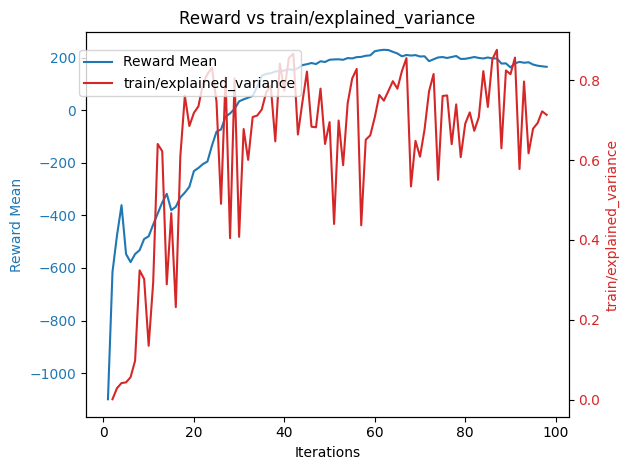

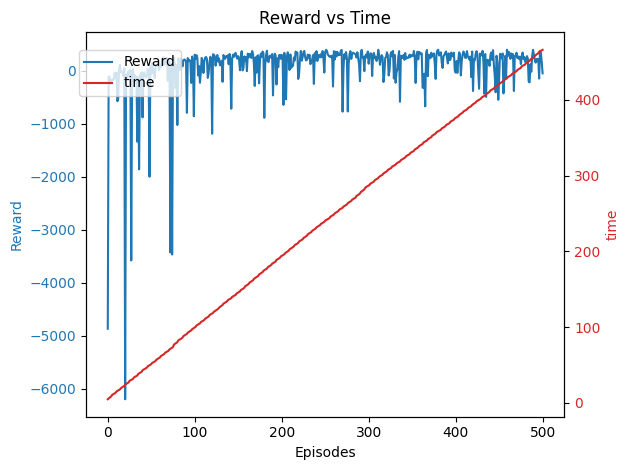

In [6]:
train_data_log: DataFrame = pd.read_csv(tmp_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(tmp_path+"monitor.csv", header=1)

# train_data_monitor = pd.concat([train_data_monitor] * 3, ignore_index=True)
print(train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = 'tab:blue'
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [7]:
seed = None
env = make(env_id, seed=seed)
model = PPO.load(name, print_system_info=True)
print(type(env))
num_steps = 1
obs, _ = env.reset()
# Variables de información:
acciones = []
rewards = []
ocu = []
tams = []
num = []
lim_ocu = 0
a2 = []
estados=[]

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)
        if len(ant) > 0 and ant != info:
            print(info["Stats"])
        ant = info

        ocu.append(info["Stats"]["OcupacionActual"])
        tams.append(info["Stats"]["TamañoTotal"])
        num.append(info["Stats"]["NumPaquetes"])
        a2.append(info["Stats"]["Action"])
        estados.append(info["Stats"]["EstadoMaquina"])

        rewards.append(reward)
        acciones.append(action.item())

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1
#estados = env.registro_Estados()
# Debug
print(f"Acciones: {acciones}")
print(list(map(lambda x: Acciones.int_to_action(x), acciones)))
print(list(map(lambda x: int(round(x, 0)), rewards)))
print(a2)
print(acciones.count(acciones[-1])/len(acciones))

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

<class 'custom_env.router_env.RouterEnv'>
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 0, 'TamañoTotal': 0.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.0, 'Descartados': 0}
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 3, 'TamañoTotal': 253.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.012, 'Descartados': 0}
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 6, 'TamañoTotal': 505.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.024, 'Descartados': 0}
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 10, 'TamañoTotal': 1042.0, 'A

In [8]:
assert len(acciones) != a2.count(
    Acciones.DENEGAR), "Se han denegado todos los paquetes"
assert len(acciones) != a2.count(
    Acciones.PERMITIR), "Se han permitido todos los paquetes"

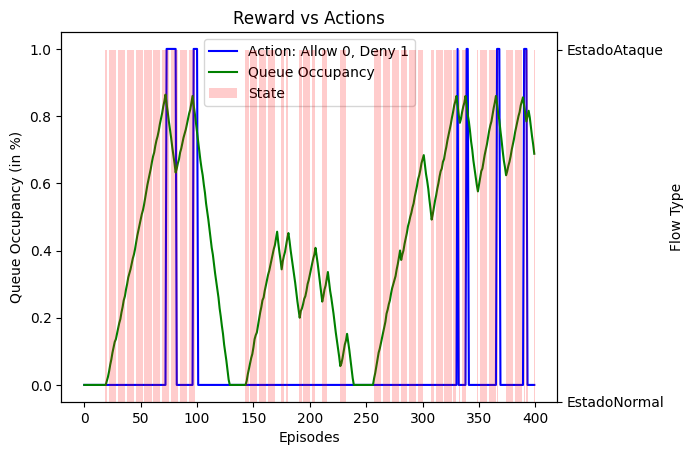

Rewards:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -2.75, -2.5, -2.75, -2.75, -2.75, -2.5, -2.5, -2.5, -2.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -2.75, -2.5, -2.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

In [9]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")

fig, ax1 = plt.subplots()

# Primer eje Y con acciones y ocupación de cola
ax1.plot(acciones, label=f"Action: Allow {Acciones.action_to_int(Acciones.PERMITIR)}, Deny {Acciones.action_to_int(Acciones.DENEGAR)}",color='#0000FF')
ax1.plot(ocu, label="Queue Occupancy",color='green')
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Queue Occupancy (in %)")
ax1.set_title("Reward vs Actions")

# Segundo eje Y con estados en gráfico de barras
ax2 = ax1.twinx()
ax2.bar(range(len(estados)), estados, color='red', label="State", alpha=0.20)
ax2.set_ylabel("Flow Type")

# Combinar leyendas de ambos ejes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

plt.show()


print("Rewards: ", rewards)
num_permitidos: int = acciones.count(Acciones.action_to_int(Acciones.PERMITIR))
print(num_permitidos, len(acciones)-num_permitidos, "",
      num_permitidos/len(acciones), 1-num_permitidos/len(acciones))

Ocupación:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012, 0.024, 0.04, 0.06, 0.076, 0.096, 0.112, 0.128, 0.136, 0.152, 0.168, 0.184, 0.196, 0.216, 0.232, 0.252, 0.264, 0.284, 0.3, 0.32, 0.332, 0.344, 0.36, 0.376, 0.388, 0.404, 0.424, 0.444, 0.46, 0.476, 0.492, 0.508, 0.52, 0.536, 0.556, 0.576, 0.596, 0.612, 0.628, 0.644, 0.664, 0.68, 0.692, 0.712, 0.728, 0.74, 0.756, 0.776, 0.792, 0.808, 0.828, 0.844, 0.864, 0.836, 0.812, 0.784, 0.76, 0.736, 0.708, 0.684, 0.66, 0.632, 0.644, 0.66, 0.672, 0.692, 0.704, 0.72, 0.736, 0.748, 0.76, 0.776, 0.792, 0.808, 0.82, 0.84, 0.86, 0.832, 0.808, 0.78, 0.752, 0.724, 0.696, 0.668, 0.644, 0.624, 0.596, 0.572, 0.54, 0.516, 0.492, 0.464, 0.436, 0.408, 0.388, 0.36, 0.332, 0.308, 0.284, 0.26, 0.228, 0.204, 0.176, 0.152, 0.12, 0.096, 0.072, 0.044, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012, 0.032, 0.048, 0.064, 0.08, 0.092, 0.112, 0.136, 0.148, 0.156, 0.1

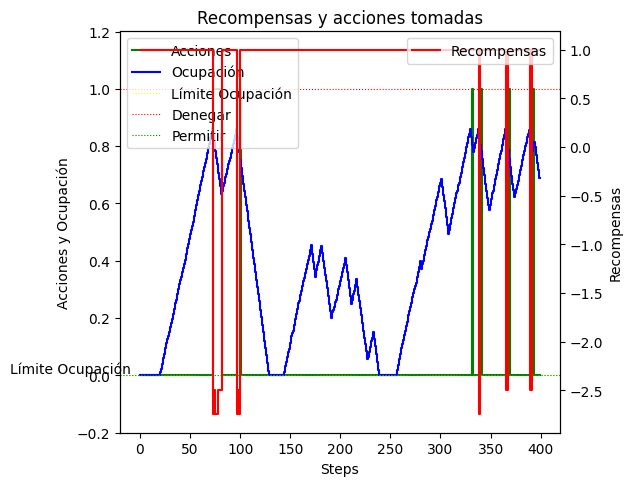

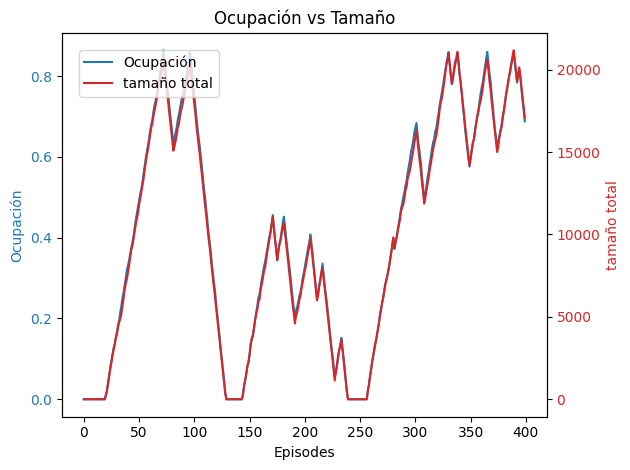

La ocupación máxima es de 86%
La ocupación mínima es de 0%


In [10]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones, label="Acciones", where='post',color='green')
# ax1.step(range(len(acciones)), [1] * len(acciones), label="Denegar", where='mid')  # Ajustar según tus datos
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid', color='blue')

# Crear línea horizontal en el gráfico
ax1.axhline(y=lim_ocu, color='yellow', linestyle='dotted',
            linewidth=0.8, label='Límite Ocupación')

# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales
if lim_ocu not in ticks:
    ticks.append(lim_ocu)  # Agregar el límite de ocupación a los ticks
ax1.set_yticks(sorted(ticks))  # Actualizar los ticks

# Anotar el límite en el eje
ax1.annotate(
    'Límite Ocupación',
    xy=(-0.1, lim_ocu),  # Coordenada en el eje Y
    xytext=(-50, lim_ocu + 5),
    textcoords='offset points',
    fontsize=10, color='black',
    ha='center',
    va='center'
)
ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc='upper left')

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc='upper right')

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x/1 for x in tams]


"""
plt.step(range(len(acciones)), acciones, label="acciones", where='mid')
plt.step(range(len(acciones)), [Acciones.action_to_int(Acciones.DENEGAR)]*len(acciones), label="Denegar", where='mid')
plt.plot([lim_ocu]*len(ocu), label="LimiteOcupación")
"""

fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = 'tab:red'
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tams)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

"""plt.step(range(len(ocu)),ocu, label="Ocupación",where='mid')
plt.step(range(len(tams)),tam, label="Tamaño",where='mid')


plt.title("Recompensas y acciones tomadas")
plt.legend()
plt.show()"""
print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")

## Pruebas:


In [11]:
print(f"Tiempo medio: {tiempo_global/iteraciones if abs(iteraciones) > 1e-5 else 0:.2f} micro-segundos de {iteraciones} iteraciones")

Tiempo medio: 0.00 micro-segundos de 0 iteraciones


In [12]:
print(Acciones.action_to_int(Acciones.PERMITIR))
print(Acciones.action_to_int(Acciones.DENEGAR))

0
1


['EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'Estado

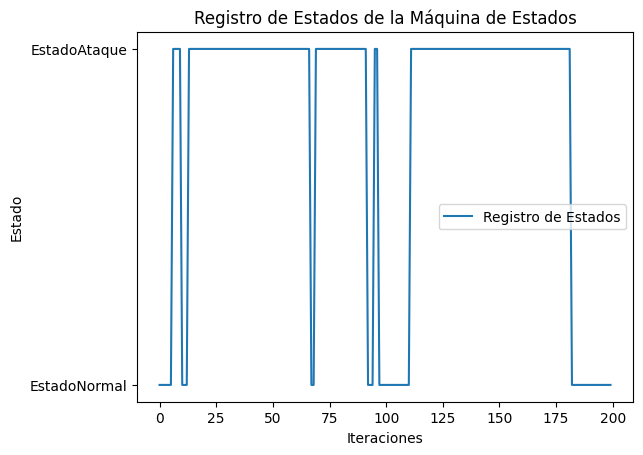

In [13]:
from custom_env.states import *
maquina = MaquinaDeEstados()
for _ in range(200):
    maquina.cambiar_estado()
print(maquina.registro_estados)

plt.plot(maquina.registro_estados, label="Registro de Estados")
plt.xlabel("Iteraciones")
plt.ylabel("Estado")
plt.title("Registro de Estados de la Máquina de Estados")
plt.legend()
plt.show()

In [14]:
# Lista de ejemplo
lista: list[str] = [x.__name__ for x in maquina.estados_posibles]
combinaciones_con_repeticion = list(product(lista, repeat=2))
dict_con: dict[tuple[str, str], int] = {
    x: 0 for x in combinaciones_con_repeticion}

print(dict_con)
duracion_ataques = []
estado_Ant = maquina.registro_estados[0]

for estado in maquina.registro_estados[1:]:
    dict_con[(estado_Ant, estado)] += 1

    if (estado_Ant, estado) == (EstadoNormal.__name__, EstadoAtaque.__name__):  # Empieza ataque
        duracion_ataques.append(1)
    elif (estado_Ant, estado) == (EstadoAtaque.__name__, EstadoAtaque.__name__):  # Sigue ataque
        if len(duracion_ataques) > 0:
            duracion_ataques[-1] += 1

    estado_Ant: Estado = estado

print(
    f"Como promedio los {len(duracion_ataques)} ataques duran {np.mean(duracion_ataques):.1f} iteraciones.")
print("Duracion 5 primeros ataques: ", duracion_ataques[:5], "...")
try:
    for estado1 in lista:
        total = 0
        for estado2 in lista:
            total += dict_con[(estado1, estado2)]
        print(f"Estando en {estado1}:")
        for estado2 in lista:
            print(f"De {estado1} a {estado2}: {
                dict_con[(estado1, estado2)] / total:6.2%}")
except:
    pass

{('EstadoNormal', 'EstadoNormal'): 0, ('EstadoNormal', 'EstadoAtaque'): 0, ('EstadoAtaque', 'EstadoNormal'): 0, ('EstadoAtaque', 'EstadoAtaque'): 0}
Como promedio los 5 ataques duran 30.8 iteraciones.
Duracion 5 primeros ataques:  [4, 54, 23, 2, 71] ...
Estando en EstadoNormal:
De EstadoNormal a EstadoNormal: 88.89%
De EstadoNormal a EstadoAtaque: 11.11%
Estando en EstadoAtaque:
De EstadoAtaque a EstadoNormal:  3.25%
De EstadoAtaque a EstadoAtaque: 96.75%


In [15]:
_np_random, _ = seeding.np_random(None)
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=True))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=False))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
print(type(0.0), type(0))
print(int(0.2))

1,10,6,3
1,9,5,3
<class 'float'> <class 'int'>
0
